In [1]:
from datetime import datetime

# 分、秒の文字列を datetime オブジェクトに
t = datetime.strptime("1:30", "%M:%S")

# 通常の計算
print(t.minute * 60 + t.second)

# timedelta オブジェクトを生成してから .total_seconds()
print((t - datetime.strptime("", "")).total_seconds())

90
90.0


In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd 

In [7]:
#netkeibaからデータを抜き出す
html = urlopen("http://race.netkeiba.com/?pid=special&id=0122")
#html形式で抜いてます
soup = BeautifulSoup(html, "html5lib")

In [8]:
#過去レースデータURLを取得
urls=[]
for link in soup.find_all('a'):
    hrefs = link.get('href')
    if hrefs.find('/race/')!=-1:
        #今回のデータに不要なものを抜くための処理
        if hrefs[28:32] !='2017':
            urls.append(hrefs)
            print(hrefs)

http://db.netkeiba.com/race/201605050811/
http://db.netkeiba.com/race/201505050911/
http://db.netkeiba.com/race/201405050911/
http://db.netkeiba.com/race/201305050811/
http://db.netkeiba.com/race/201205050811/
http://db.netkeiba.com/race/201105050810/
http://db.netkeiba.com/race/201005050810/
http://db.netkeiba.com/race/200905050810/
http://db.netkeiba.com/race/200805050810/
http://db.netkeiba.com/race/200705050810/
http://db.netkeiba.com/race/200605050810/
http://db.netkeiba.com/race/200505050810/
http://db.netkeiba.com/race/200405050811/
http://db.netkeiba.com/race/200305040810/
http://db.netkeiba.com/race/200206040810/
http://db.netkeiba.com/race/200105050810/
http://db.netkeiba.com/race/200005060810/
http://db.netkeiba.com/race/199905050810/
http://db.netkeiba.com/race/199805050810/
http://db.netkeiba.com/race/199705050810/
http://db.netkeiba.com/race/199605060810/
http://db.netkeiba.com/race/199505050810/
http://db.netkeiba.com/race/199405050810/
http://db.netkeiba.com/race/199305

In [26]:
url =     urlopen('http://db.netkeiba.com/race/201605050811/')
soup3 = BeautifulSoup(url , "html5lib")
soup4 = soup3.div.dd.span



<span>芝左2400m / 天候 : 小雨 / 芝 : 良 / 発走 : 15:40</span>

In [12]:
###### soup_tab2 = soup.find_all("table")
#urlからレースリンクの抽出

race_datas=pd.DataFrame()
counter = 1
            
for race_link in urls:
    print(race_link)
    race_html = urlopen(race_link)
    #該当URLのhtml形式の中からTable内のデータを取得します。     
    race_fetched_dataframes = pd.io.html.read_html(race_link)
    #今回は該当データの配列が０番に該当したのでそちらを取得します。
    race_data = race_fetched_dataframes[0]
    print(race_link)
    soup3 = BeautifulSoup(race_html , "html5lib")
    soup4 = soup3.div.dd.span

    #データフレーム内に年の情報がなかったのでURL情報が取得し、年情報を作成します。
    race_data['year']= race_link[28:32]
    race_data['meta']=soup4.text
    #jupyter内で作成したデータをCSV形式て出力します。
#     race_data.to_csv('race_' + race_link[28:32] + '.csv',encoding='sjis')
    #別途抽出するデータを事前に縦方向に結合します。axisは行列方向を指定します。行(0),列(1)
    race_datas = pd.concat([race_datas,race_data],axis=0)
#結合したデータをCSVで出力します。
race_datas.to_csv('races.csv',encoding='shift_jisx0213')
        

http://db.netkeiba.com/race/201605050811/
http://db.netkeiba.com/race/201605050811/
http://db.netkeiba.com/race/201505050911/
http://db.netkeiba.com/race/201505050911/
http://db.netkeiba.com/race/201405050911/
http://db.netkeiba.com/race/201405050911/
http://db.netkeiba.com/race/201305050811/
http://db.netkeiba.com/race/201305050811/
http://db.netkeiba.com/race/201205050811/
http://db.netkeiba.com/race/201205050811/
http://db.netkeiba.com/race/201105050810/
http://db.netkeiba.com/race/201105050810/
http://db.netkeiba.com/race/201005050810/
http://db.netkeiba.com/race/201005050810/
http://db.netkeiba.com/race/200905050810/
http://db.netkeiba.com/race/200905050810/
http://db.netkeiba.com/race/200805050810/
http://db.netkeiba.com/race/200805050810/
http://db.netkeiba.com/race/200705050810/
http://db.netkeiba.com/race/200705050810/
http://db.netkeiba.com/race/200605050810/
http://db.netkeiba.com/race/200605050810/
http://db.netkeiba.com/race/200505050810/
http://db.netkeiba.com/race/200505

In [3]:
import pandas as pd 
from datetime import datetime


In [4]:
#ファイルを読み込む
df = pd.read_csv('races.csv',encoding='shift_jisx0213',parse_dates=True)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,year,meta
0,0,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,...,人気,馬体重,調教ﾀｲﾑ,厩舎ｺﾒﾝﾄ,備考,調教師,馬主,賞金(万円),2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40
1,1,1,8,16,ミッキーアイル,牡5,57,浜中俊,1:33.1,NaN,...,3,484(-2),NaN,NaN,NaN,[西] 音無秀孝,野田みづき,10678.0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40
2,2,2,4,8,イスラボニータ,牡5,57,ルメール,1:33.1,アタマ,...,2,480(-2),NaN,NaN,NaN,[東] 栗田博憲,社台レースホース,4208.0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40
3,3,3,7,15,ネオリアリズム,牡5,57,ムーア,1:33.2,3/4,...,7,502(+6),NaN,NaN,NaN,[東] 堀宣行,キャロットファーム,2654.0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40
4,4,4,3,6,ダノンシャーク,牡8,57,松山弘平,1:33.4,3/4,...,14,456(+6),NaN,NaN,NaN,[西] 大久保龍,ダノックス,1500.0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40


In [5]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'year',
       'meta'],
      dtype='object')

In [6]:
#列を限定します。
datas1 = df[['year', 'meta','0', '1', '2', '3', '4', '7', '10', '11', '12', '13', '14']]
datas1.head()

,year,meta,0,1,2,3,4,7,10,11,12,13,14
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,単勝,人気,馬体重
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,5.9,3,484(-2)
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,4.8,2,480(-2)
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,14.0,7,502(+6)
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,105.1,14,456(+6)


In [7]:
#ハイフンを抜き出します。
datas1['tuka'] = df['10'].str.split('-')
datas1['tuka1'] = df['10'].str.split('-').str[0]
datas1['tuka2'] = df['10'].str.split('-').str[1]
# datas1['tuka1'] = df['10'].apply(lambda x: x.split('-'))
# datas1['tuka'] = df.ix[:,'10',0:1]
# datas1['tuka'] = df.ix[:,'10'][:,:]
# datas1['tuka'] = datas1.loc[:,['tuka']]
datas1.head()

/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,year,meta,0,1,2,3,4,7,10,11,12,13,14,tuka,tuka1,tuka2
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,単勝,人気,馬体重,[通過],通過,NaN
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,5.9,3,484(-2),"[1, 1]",1,1
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,4.8,2,480(-2),"[6, 5]",6,5
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,14.0,7,502(+6),"[2, 2]",2,2
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,105.1,14,456(+6),"[12, 11]",12,11


In [8]:
#年齢と性別を分けます。
datas1['sex'] = df['4'].str[0:1]
datas1['age'] = df['4'].str[1:2]
datas1.head()

/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,meta,0,1,2,3,4,7,10,11,12,13,14,tuka,tuka1,tuka2,sex,age
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,単勝,人気,馬体重,[通過],通過,NaN,性,齢
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,5.9,3,484(-2),"[1, 1]",1,1,牡,5
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,4.8,2,480(-2),"[6, 5]",6,5,牡,5
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,14.0,7,502(+6),"[2, 2]",2,2,牡,5
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,105.1,14,456(+6),"[12, 11]",12,11,牡,8


In [9]:
#馬体重を分ける
datas1['weight'] = df['14'].str[0:3]
datas1['weight+-'] = df['14'].str[4:-1]

datas1.head()

/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,meta,0,1,2,3,4,7,10,11,12,13,14,tuka,tuka1,tuka2,sex,age,weight,weight+-
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,単勝,人気,馬体重,[通過],通過,NaN,性,齢,馬体重,
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,5.9,3,484(-2),"[1, 1]",1,1,牡,5,484,-2
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,4.8,2,480(-2),"[6, 5]",6,5,牡,5,480,-2
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,14.0,7,502(+6),"[2, 2]",2,2,牡,5,502,+6
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,105.1,14,456(+6),"[12, 11]",12,11,牡,8,456,+6


In [10]:
#datas1['floor'] = datas1['meta'].str.split(' ').str[0]
datas1['range'] = datas1['meta'].str.split(' ').str[1]
datas1['range'] = datas1['range'].str[1:5]
datas1['wk'] = datas1['meta'].str.split(' ').str[3]
datas1['weather'] =datas1['wk'].str.split('/').str[0]
datas1['floor'] =datas1['wk'].str.split('/').str[1]
# datas1['wether'] = datas1['wether'].str.split(' ').str[1]

datas1.head()

/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,year,meta,0,1,2,3,4,7,10,11,...,tuka1,tuka2,sex,age,weight,weight+-,range,wk,weather,floor
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,...,通過,NaN,性,齢,馬体重,,1600,曇 / 芝,曇,芝
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,...,1,1,牡,5,484,-2,1600,曇 / 芝,曇,芝
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,...,6,5,牡,5,480,-2,1600,曇 / 芝,曇,芝
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,...,2,2,牡,5,502,+6,1600,曇 / 芝,曇,芝
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,...,12,11,牡,8,456,+6,1600,曇 / 芝,曇,芝


In [11]:
datas1['sex'] = datas1['sex'].where(datas1['sex'] == '牡',1)
datas1['sex'] = datas1['sex'].where(datas1['sex'] != '牡',0)
datas1.head()
# [datas1['sex'] == '牡':'1','0']

,year,meta,0,1,2,3,4,7,10,11,...,tuka1,tuka2,sex,age,weight,weight+-,range,wk,weather,floor
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,...,通過,NaN,1,齢,馬体重,,1600,曇 / 芝,曇,芝
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,...,1,1,0,5,484,-2,1600,曇 / 芝,曇,芝
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,...,6,5,0,5,480,-2,1600,曇 / 芝,曇,芝
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,...,2,2,0,5,502,+6,1600,曇 / 芝,曇,芝
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,...,12,11,0,8,456,+6,1600,曇 / 芝,曇,芝


In [12]:
datas1['weather'] = datas1['weather'].where(datas1['weather'] == '晴',1)
datas1['weather'] = datas1['weather'].where(datas1['weather'] == '曇',2)
datas1['weather'] = datas1['weather'].where(datas1['weather'] == '雨',3)
datas1.head()

,year,meta,0,1,2,3,4,7,10,11,...,tuka1,tuka2,sex,age,weight,weight+-,range,wk,weather,floor
0,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,着順,枠番,馬番,馬名,性齢,タイム,通過,上り,...,通過,NaN,1,齢,馬体重,,1600,曇 / 芝,3,芝
1,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,1,8,16,ミッキーアイル,牡5,1:33.1,1-1,35.6,...,1,1,0,5,484,-2,1600,曇 / 芝,3,芝
2,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,2,4,8,イスラボニータ,牡5,1:33.1,6-5,35.0,...,6,5,0,5,480,-2,1600,曇 / 芝,3,芝
3,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,3,7,15,ネオリアリズム,牡5,1:33.2,2-2,35.6,...,2,2,0,5,502,+6,1600,曇 / 芝,3,芝
4,2016,芝右 外1600m / 天候 : 曇 / 芝 : 良 / 発走 : 15:40,4,3,6,ダノンシャーク,牡8,1:33.4,12-11,34.8,...,12,11,0,8,456,+6,1600,曇 / 芝,3,芝


In [13]:
datas1.columns

Index(['year', 'meta', '0', '1', '2', '3', '4', '7', '10', '11', '12', '13',
       '14', 'tuka', 'tuka1', 'tuka2', 'sex', 'age', 'weight', 'weight+-',
       'range', 'wk', 'weather', 'floor'],
      dtype='object')

In [14]:
#さらに不要なデータを抽出します。
datas2 = datas1[['year','0','1','2','3','7','11','12','13','tuka1','tuka2','sex','age','weight', 'weight+-','range', 'weather', 'floor']]
#不要なデータを削除します。今回であれば数値データ内に文字データが入っていたので削除しました。
datas2 = datas2[datas2['0']!='着順' ]
datas2 = datas2[datas2['0']!='取']
datas2 = datas2[datas2['0']!='中']
datas2 = datas2[datas2['0']!='7(降)']
datas2 = datas2[datas2['0']!='12(降)']
#各カラムに名前をつけます。


In [15]:
datas2.columns = ['year','rank','wakuban','umaren','name','time','agari','ozzu','ninki','tuka1','tuka2','sex','age','weight', 'weight+-','range', 'weather', 'floor']
datas2.head()

,year,rank,wakuban,umaren,name,time,agari,ozzu,ninki,tuka1,tuka2,sex,age,weight,weight+-,range,weather,floor
1,2016,1,8,16,ミッキーアイル,1:33.1,35.6,5.9,3,1,1,0,5,484,-2,1600,3,芝
2,2016,2,4,8,イスラボニータ,1:33.1,35.0,4.8,2,6,5,0,5,480,-2,1600,3,芝
3,2016,3,7,15,ネオリアリズム,1:33.2,35.6,14.0,7,2,2,0,5,502,+6,1600,3,芝
4,2016,4,3,6,ダノンシャーク,1:33.4,34.8,105.1,14,12,11,0,8,456,+6,1600,3,芝
5,2016,5,1,2,サトノアラジン,1:33.4,35.0,3.8,1,8,8,0,5,526,-6,1600,3,芝


In [16]:
#文字型で認識されているので数値で取り込みます。
datas２['rank'] = datas2['rank'].astype(float)
datas2['time'] = pd.to_datetime(datas2['time'],format='%M:%S.%f') -pd.to_datetime('0:00.0',format='%M:%S.%f')
#datas2['rtime']  = datas2['time'].minute * 60 + datas2['time'].second
datas２['wakuban'] = datas2['wakuban'].astype(float)
datas２['umaren'] = datas2['umaren'].astype(float)
datas２['agari'] = datas2['agari'].astype(float)
datas２['ninki'] = datas2['ninki'].astype(float)
datas２['tuka1'] = datas2['tuka1'].astype(float)
datas２['tuka2'] = datas2['tuka2'].astype(float)
datas２['ozzu'] = datas2['ozzu'].dropna()
datas２['sex'] = datas2['sex'].astype(int)
datas２['age'] = datas2['age'].astype(float)
datas２['weight'] = datas2['weight'].astype(int)
datas２['weight+-'] = datas2['weight+-'].astype(int)
datas2['weather'] = datas2['weather'].astype(int)
#datas２['range'] = datas2['range'].astype(float)
# datas２['sex'] = data2[if data2['sex']=='牝' : ]
datas2.head()

,year,rank,wakuban,umaren,name,time,agari,ozzu,ninki,tuka1,tuka2,sex,age,weight,weight+-,range,weather,floor
1,2016,1.0,8.0,16.0,ミッキーアイル,00:01:33.100000,35.6,5.9,3.0,1.0,1.0,0,5.0,484,-2,1600,3,芝
2,2016,2.0,4.0,8.0,イスラボニータ,00:01:33.100000,35.0,4.8,2.0,6.0,5.0,0,5.0,480,-2,1600,3,芝
3,2016,3.0,7.0,15.0,ネオリアリズム,00:01:33.200000,35.6,14.0,7.0,2.0,2.0,0,5.0,502,6,1600,3,芝
4,2016,4.0,3.0,6.0,ダノンシャーク,00:01:33.400000,34.8,105.1,14.0,12.0,11.0,0,8.0,456,6,1600,3,芝
5,2016,5.0,1.0,2.0,サトノアラジン,00:01:33.400000,35.0,3.8,1.0,8.0,8.0,0,5.0,526,-6,1600,3,芝


In [17]:
datas2.to_csv('out.csv')

In [ ]:
#加工したデータで相関関係を確認します。
datas2.corr()

/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))
/Users/yobe/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3.0, top=3.0
  'bottom=%s, top=%s') % (bottom, top))


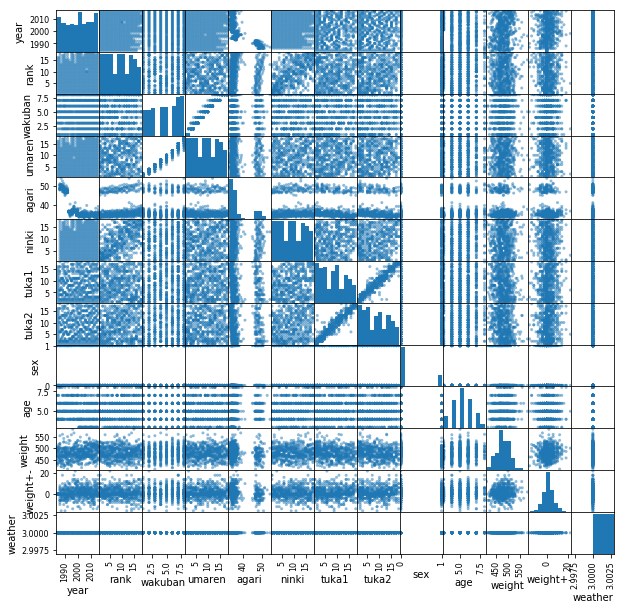

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(datas2, figsize=(10,10))
plt.show()

In [ ]:
datas2.iloc[:,1:].describe()

In [ ]:
#クラスタ分析
!pip install pyper

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
mms.min_,mms.scale_